In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [394]:
budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [395]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [396]:
#Data Cleaning
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')

In [397]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [398]:
budgets['production_budget'] = budgets['production_budget'].replace('\$', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].replace(',', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('\$', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace(',', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('\$', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(',', '', regex=True)

In [399]:
budgets['production_budget'] = budgets['production_budget'].astype('int64')
budgets['domestic_gross'] = budgets['domestic_gross'].astype('int64')
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype('int64')
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [400]:
#Creating two columns: revenue and ROI
budgets['revenues'] = budgets['worldwide_gross']-budgets['production_budget']
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [401]:
budgets['ROI'] = budgets['revenues']/budgets['production_budget']
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [402]:
budgets['ROI'].describe()

count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: ROI, dtype: float64

In [403]:
budgets.loc[budgets['ROI'] == 1799]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,44975000,1799.0


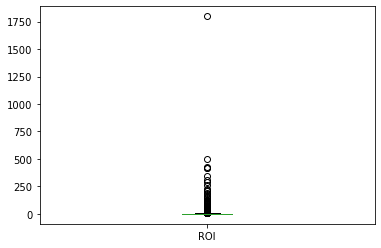

In [404]:
#looking for outliers
budgets['ROI'].plot.box();

In [405]:
#these movies didn'g get any profits
no_profits = budgets[budgets['revenues'] < 0]
no_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,-14997885,-0.054538
108,9,2007-06-22,Evan Almighty,175000000,100289690,174131329,-868671,-0.004964
110,11,2017-05-12,King Arthur: Legend of the Sword,175000000,39175066,139630336,-35369664,-0.202112
111,12,2013-12-25,47 Ronin,175000000,38362475,151716815,-23283185,-0.133047
...,...,...,...,...,...,...,...,...
5772,73,2012-01-13,Newlyweds,9000,4584,4584,-4416,-0.490667
5776,77,2004-12-31,The Mongol King,7000,900,900,-6100,-0.871429
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-1.000000
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400


In [406]:
#budgets = budgets.drop(budgets[budgets['revenues'] == 0.0].index)

In [407]:
#budgets['revenues'].describe()

In [408]:
#these movies generated profits
profits = budgets.loc[(budgets['ROI'] > 0)]
profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,2004-10-08,Primer,7000,424760,841926,834926,119.275143
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857
5778,79,1999-04-02,Following,6000,48482,240495,234495,39.082500


In [409]:
#Confirming there is a correlation between budget and revenues
corr = budgets['production_budget'].corr(budgets['worldwide_gross'])
print ("Correlation between Budget and WWGross is: ", round(corr, 2))

Correlation between Budget and WWGross is:  0.75


In [410]:
#but a very little negative correlation between budget and roi
corr = budgets['production_budget'].corr(budgets['ROI'])
print ("Correlation between Budget and ROI is: ", round(corr, 2))

Correlation between Budget and ROI is:  -0.05


In [411]:
#for this analysis we will focus on the 25% of the movies that generated more profits
mayor_profits = budgets.loc[budgets['ROI'] > (budgets['ROI'].quantile(.75))]
mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,2004-10-08,Primer,7000,424760,841926,834926,119.275143
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857
5778,79,1999-04-02,Following,6000,48482,240495,234495,39.082500


<ipython-input-412-6769c5594582>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


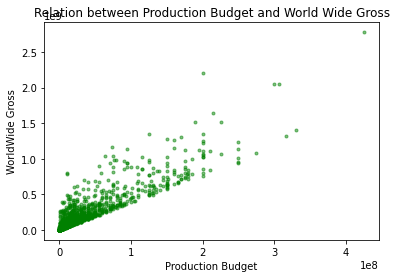

In [412]:

x= mayor_profits['production_budget'] 
y = mayor_profits['worldwide_gross']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and World Wide Gross')
ax.set_ylabel('WorldWide Gross')
ax.set_xlabel('Production Budget')
fig.show();

In [413]:
#Getting rid of the outliers that could alter our anaylisis
mayor_profits['production_budget'].quantile(.975)

177625000.0

In [414]:
#These are the most expensive movies in our table of movies with mayor profits
outliers_budget = mayor_profits[mayor_profits['production_budget'] > (mayor_profits['production_budget'].quantile(.975))]
outliers_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,809439099,2.943415
16,17,2016-05-06,Captain America: Civil War,250000000,408084349,1140069413,890069413,3.560278
18,19,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,767003568,3.068014
20,21,2013-12-13,The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,710366855,2.841467
21,22,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,695577621,2.782310


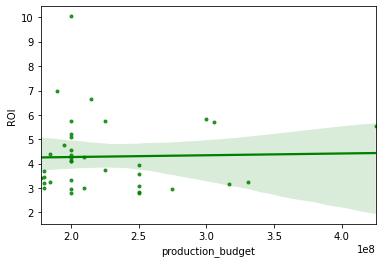

In [415]:
sns.regplot(x=outliers_budget['production_budget'], y=outliers_budget['ROI'], color = 'green', marker = '.');

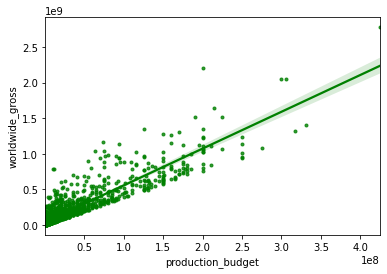

In [416]:
#There is a correlation between budget and worldwide_gross on our mayor profits table
sns.regplot(x=mayor_profits['production_budget'], y=mayor_profits['worldwide_gross'], color = 'green', marker = '.');

<ipython-input-417-d5ab9cc8755a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


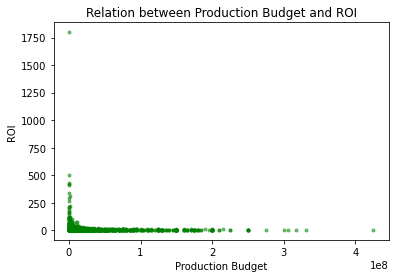

In [417]:
#Exploring the relation between budget and roi. Too many outliers.
x= mayor_profits['production_budget'] 
y = mayor_profits['ROI']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget')
fig.show();

In [418]:
#Identifying the outliers
mayor_profits['ROI'].quantile(.975)

74.45269468333333

In [419]:
outlier_roi = mayor_profits[mayor_profits['ROI']> (mayor_profits['ROI'].quantile(.975))]
outlier_roi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
3525,26,1982-06-11,ET: The Extra-Terrestrial,10500000,435110554,792965326,782465326,74.520507
4567,68,1939-12-15,Gone with the Wind,3900000,198680470,390525192,386625192,99.134665
4775,76,1950-02-15,Cinderella,2900000,85000000,263591415,260691415,89.893591
5117,18,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,183437486,123.277880
5156,57,2004-10-29,Saw,1200000,55968727,103880027,102680027,85.566689
5210,11,1976-11-21,Rocky,1000000,117235147,225000000,224000000,224.000000
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,100759490,100.759490
5346,47,1942-08-13,Bambi,858000,102797000,268000000,267142000,311.354312
5357,58,1971-01-01,Billy Jack,800000,98000000,98000000,97200000,121.500000
5372,73,1973-08-11,American Graffiti,777000,115000000,140000000,139223000,179.180180


In [420]:
clean_mayor_profits = mayor_profits.drop(mayor_profits[mayor_profits['ROI'] > mayor_profits['ROI'].quantile(.975)].index)
clean_mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5765,66,2001-03-09,Dayereh,10000,673780,673780,663780,66.378000
5766,67,2006-04-28,Clean,10000,138711,138711,128711,12.871100
5767,68,2001-07-06,Cure,10000,94596,94596,84596,8.459600
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857


In [421]:
clean_mayor_profits.describe()

,id,production_budget,domestic_gross,worldwide_gross,revenues,ROI
count,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1409.000000
mean,52.942512,3.274963e+07,9.097377e+07,2.090637e+08,1.763141e+08,8.904516
std,28.342948,4.879021e+07,1.056583e+08,2.801911e+08,2.371200e+08,9.925783
min,1.000000,6.000000e+03,0.000000e+00,7.164400e+04,6.464400e+04,2.759234
25%,29.000000,4.300000e+06,1.937598e+07,3.600587e+07,3.019543e+07,3.780000
50%,55.000000,1.400000e+07,5.533442e+07,1.023107e+08,8.826658e+07,5.509544
75%,77.000000,3.800000e+07,1.255487e+08,2.612494e+08,2.244501e+08,9.213527
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,73.978007


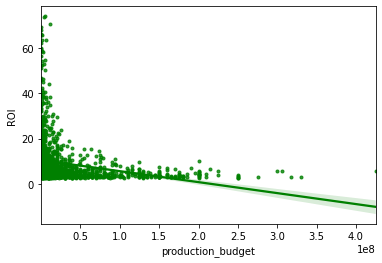

In [422]:
sns.regplot(x=clean_mayor_profits['production_budget'], y=clean_mayor_profits['ROI'], color = 'green', marker = '.');

<ipython-input-423-1229d65ac1e0>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


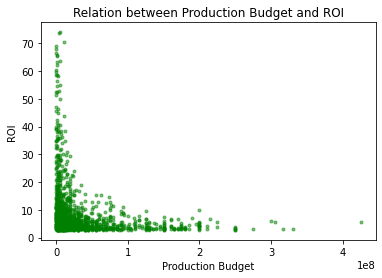

In [423]:
x= clean_mayor_profits['production_budget'] 
y = clean_mayor_profits['ROI']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget')
fig.show();

In [441]:
clean_mayor_profits['production_budget'].quantile(.75)

38000000.0

In [425]:
clean_mayor_profits['production_budget'].mean()

32749632.403122783

In [426]:
mayor_profits['production_budget'].quantile(.75)

35750000.0

In [427]:
mayor_profits['production_budget'].mean()

31932448.932226833

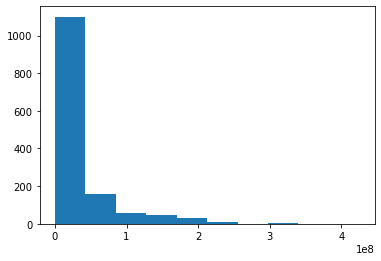

In [428]:
plt.hist(clean_mayor_profits['production_budget'], bins=10);

In [429]:
#What happens with the mayor budgets movies?
mayor_budgets = budgets.loc[budgets['production_budget'] > (budgets['production_budget'].quantile(.75))]
mayor_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
...,...,...,...,...,...,...,...,...
1369,70,2002-11-08,8 Mile,41000000,116724075,245768384,204768384,4.994351
1370,71,2019-05-31,Rocketman,41000000,57342725,108642725,67642725,1.649823
1371,72,2001-05-11,A Knightâs Tale,41000000,56083966,100622586,59622586,1.454209
1372,73,2003-08-22,The Medallion,41000000,22108977,22108977,-18891023,-0.460757


<ipython-input-430-e09f62ce6901>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


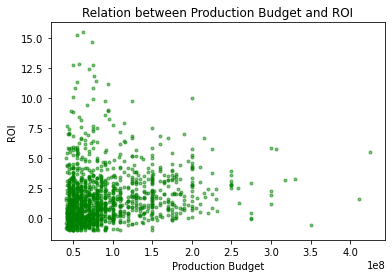

In [430]:
x= mayor_budgets['production_budget'] 
y = mayor_budgets['ROI']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget')
fig.show();

In [431]:
mayor_budgets['ROI'].describe()

count    1374.000000
mean        1.684783
std         2.213948
min        -1.000000
25%         0.148358
50%         1.172796
75%         2.578136
max        15.489089
Name: ROI, dtype: float64

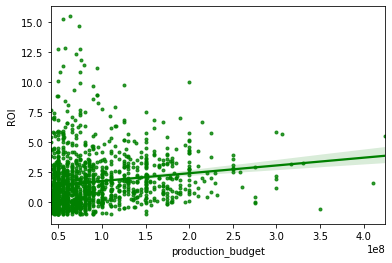

In [432]:
sns.regplot(x=mayor_budgets['production_budget'], y=mayor_budgets['ROI'], color = 'green', marker = '.');

In [436]:
mayor_budgets['production_budget'].quantile(.25)

55000000.0

In [444]:
budgets['production_budget'].quantile(.75)

40000000.0